# K-means tutorial

## 초기 설정

In [1]:
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import math
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt

### 데이터 생성

In [2]:
# 2개의 feature를 가지고 있는 100개의 샘플을 생성
x, _ = make_blobs(n_samples=100, centers=4, n_features=2, random_state=10)
print(x.shape)

(100, 2)


In [3]:
# 데이터의 첫 5개 rows를 살펴보기
points = pd.DataFrame(x)
points.columns = ['x1', 'x2']
points.head()

,x1,x2
0,-5.577854,5.872988
1,1.627832,4.178069
2,-6.371844,4.419223
3,1.750055,5.445829
4,6.550104,-7.912339


<AxesSubplot:xlabel='x1', ylabel='x2'>

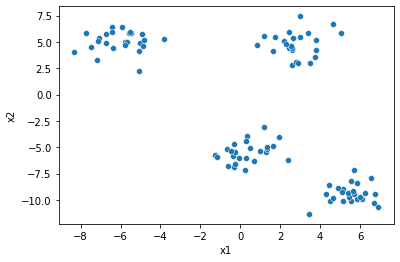

In [4]:
# 데이터 분포 시각화
sns.scatterplot(x='x1', y='x2', data=points)

## K-means 구현

### 1) 랜덤한 k개의 중심 선택

In [5]:
# 랜덤으로 4개의 샘플 선택
centroids = points.sample(4, random_state=3)
centroids

,x1,x2
93,3.801750,4.278268
67,2.591843,4.446782
6,0.480855,-5.089769
64,1.314690,-5.010552


<AxesSubplot:xlabel='x1', ylabel='x2'>

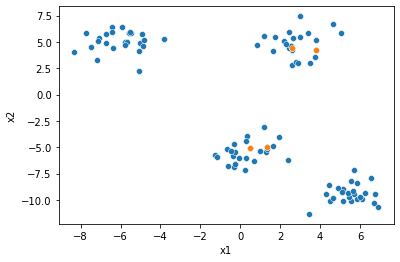

In [6]:
# 데이터 분포(선택된 중심점은 붉은 색으로 표시)
sns.scatterplot(x='x1', y='x2', data=points)
sns.scatterplot(x='x1', y='x2', data=centroids, palette='red')

### 2) 각 중심점과의 거리 계산 및 클러스터 할당

In [7]:
# 선택된 4개의 점과 나머지 점들에 대해 유클리드 거리 계산
distance = sp.spatial.distance.cdist(points, centroids, "euclidean")

# 4개의 점 중 가장 가까운 점을 선택(클러스터)
cluster_num = np.argmin(distance, axis=1)

print(distance.shape, cluster_num.shape)

(100, 4) (100,)


In [8]:
result = points.copy()
result['cluster'] = cluster_num
result.head()

,x1,x2,cluster
0,-5.577854,5.872988,1
1,1.627832,4.178069,1
2,-6.371844,4.419223,1
3,1.750055,5.445829,1
4,6.550104,-7.912339,3


<AxesSubplot:xlabel='x1', ylabel='x2'>

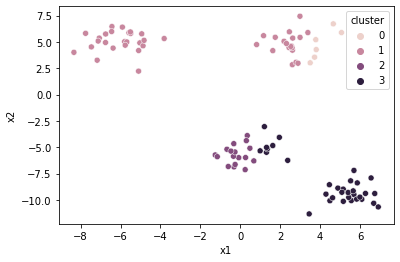

In [9]:
sns.scatterplot(x='x1', y='x2', hue='cluster', data=result)

### 3) 생성된 각 클러스터 점들의 중심점 계산

In [10]:
# 클러스터 별 점들의 평균 위치
centroids_2 = result.groupby('cluster').mean()
centroids_2

,x1,x2
cluster,,
0,4.087875,4.782067
1,-2.402204,4.952974
2,-0.201556,-5.715952
3,4.533266,-8.314421


In [11]:
# 새로운 중심에 대한 거리 계산 및 크러스터 재할당
distance_2 = sp.spatial.distance.cdist(points, centroids_2, 'euclidean')

cluster_num_2 = np.argmin(distance_2, axis=1)

print(distance_2.shape, cluster_num_2.shape)

(100, 4) (100,)


In [14]:
result = points.copy()
result['cluster'] = cluster_num_2
result.head()

,x1,x2,cluster
0,-5.577854,5.872988,1
1,1.627832,4.178069,0
2,-6.371844,4.419223,1
3,1.750055,5.445829,0
4,6.550104,-7.912339,3


<AxesSubplot:xlabel='x1', ylabel='x2'>

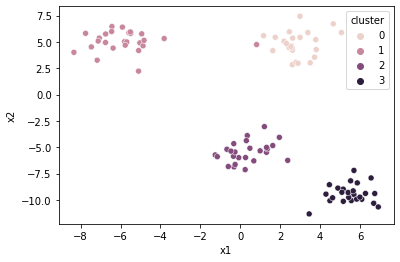

In [15]:
sns.scatterplot(x='x1', y='x2', hue='cluster', data=result)

### 4) 의미있는 클러스터 할당이 있을 때까지 3)을 반복

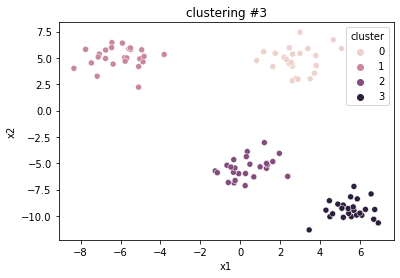

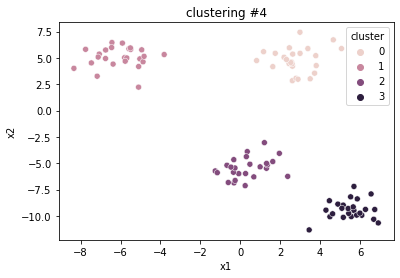

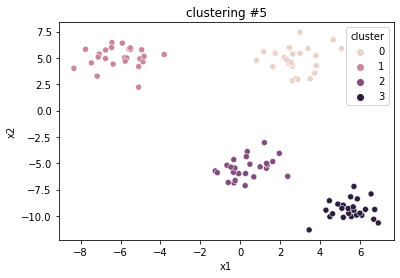

In [17]:
# 추가적으로 3번 더 반복 후 plot
N = 3

for n in range(N):
    cent = result.groupby('cluster').mean()
    dist = sp.spatial.distance.cdist(points, cent, 'euclidean')
    clus_num = np.argmin(dist, axis=1)
    result['cluster'] = clus_num
    sns.scatterplot(x='x1', y='x2', hue='cluster', data=result)
    plt.title(f'clustering #{n+3}')
    plt.show()

## 구현된 K-Means 사용

In [18]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(points)

KMeans(n_clusters=4)

In [19]:
result_by_sklearn = points.copy()
result_by_sklearn['cluster'] = kmeans.labels_
result_by_sklearn.head()

,x1,x2,cluster
0,-5.577854,5.872988,2
1,1.627832,4.178069,1
2,-6.371844,4.419223,2
3,1.750055,5.445829,1
4,6.550104,-7.912339,0


<AxesSubplot:xlabel='x1', ylabel='x2'>

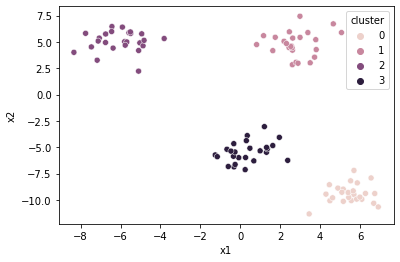

In [21]:
sns.scatterplot(x="x1", y="x2", hue="cluster", data=result_by_sklearn)